### PROBLEM STATEMENT
**Model Training** on **Customer Churn Dataset** to develop a **Machine Learning** model that can predict whether a customer will churn or not. The dataset has been preprocessed to ensure it is suitable for modeling.

### Stages of Model Training
1. Splitting the dataset into training and testing sets
2. Selecting and training different machine learning models
3. Evaluating model performance using appropriate metrics
4. Hyperparameter tuning to improve model performance

### Importing Required Python libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Data Loading & Splitting

In [18]:
train_data = pd.read_csv('Data_Preprocessed/new_train.csv')
train_data.head()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Subscription Type Encoded,Gender Encoded,Contract Length_Annual,Contract Length_Monthly
0,0.255319,0.644068,0.448276,0.5,0.600000,0.924444,0.551724,1.0,0.0,0,1.0,0.0
1,1.000000,0.813559,0.000000,1.0,0.266667,0.507778,0.172414,1.0,1.0,0,0.0,1.0
2,0.787234,0.220339,0.103448,0.6,0.600000,0.094444,0.068966,1.0,1.0,0,0.0,0.0
3,0.851064,0.627119,0.689655,0.7,0.233333,0.328889,0.965517,1.0,0.0,1,0.0,1.0
4,0.106383,0.525424,0.655172,0.5,0.266667,0.574444,0.655172,1.0,1.0,1,0.0,1.0


In [19]:
test_data = pd.read_csv('Data_Preprocessed/new_test.csv')
test_data.head()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Subscription Type Encoded,Gender Encoded,Contract Length_Annual,Contract Length_Monthly
0,0.085106,0.406780,0.448276,0.4,0.900000,0.553333,0.275862,1,1.0,0,0.0,1.0
1,0.489362,0.457627,0.931034,0.7,0.433333,0.537778,0.655172,0,0.0,0,0.0,1.0
2,0.617021,0.440678,0.310345,0.2,0.966667,0.730000,0.689655,0,2.0,1,1.0,0.0
3,0.361702,0.135593,0.379310,0.5,0.566667,0.146667,0.586207,0,2.0,1,0.0,0.0
4,0.744681,0.966102,0.793103,0.9,0.066667,0.481111,0.586207,0,0.0,0,1.0,0.0


In [20]:
X_train = train_data.drop(columns=['Churn'])
y_train = train_data['Churn']
X_test = test_data.drop(columns=['Churn'])
y_test = test_data['Churn']

In [5]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (440832, 11)
Shape of y_train: (440832,)
Shape of X_test: (64374, 11)
Shape of y_test: (64374,)


### Initial Models Training

In [6]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(eval_metric='logloss'),
    'LightGBM': LGBMClassifier()
}

# Train models
model_results = {}
feature_importance = None  # Placeholder for feature importance

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    model_results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    }

# Convert results to DataFrame
results_df = pd.DataFrame(model_results).T
print(results_df)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 249999, number of negative: 190833
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005286 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 474
[LightGBM] [Info] Number of data points in the train set: 440832, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.567107 -> initscore=0.270058
[LightGBM] [Info] Start training from score 0.270058
                     Accuracy  Precision    Recall  F1 Score
Logistic Regression  0.571069   0.525041  0.990490  0.686291
Random Forest        0.503495   0.488223  0.998524  0.655797
Gradient Boosting    0.506043   0.489507  0.998295  0.656905
XGBoost              0.503418   0.488186  0.998721  0.655806
LightGBM             0.503309   0.488131  0.998754  0.655

### Checking Feature Importance

C:\Users\hp\AppData\Local\Temp\ipykernel_7808\362242920.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=feature_names, palette="viridis")


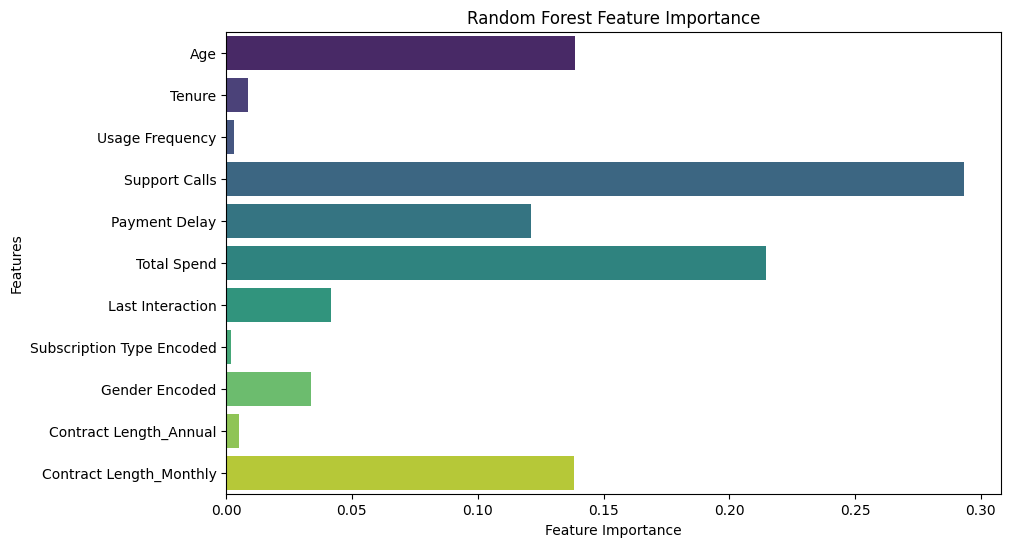

In [7]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
feature_importance = rf_model.feature_importances_
feature_names = X_train.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_names, palette="viridis")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Random Forest Feature Importance")
plt.show()

### Training after dropping less important features

In [21]:
columns = ['Usage Frequency', 'Subscription Type Encoded', 'Tenure', 'Contract Length_Annual']
X_train = X_train.drop(columns=columns, axis=1)
X_test = X_test.drop(columns=columns, axis=1)

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(eval_metric='logloss'),
    'LightGBM': LGBMClassifier()
}

# Train models
model_results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    model_results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    }

# Convert results to DataFrame
results_df = pd.DataFrame(model_results).T
print(results_df)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 249999, number of negative: 190833
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004884 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 379
[LightGBM] [Info] Number of data points in the train set: 440832, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.567107 -> initscore=0.270058
[LightGBM] [Info] Start training from score 0.270058
                     Accuracy  Precision    Recall  F1 Score
Logistic Regression  0.570386   0.524661  0.989670  0.685770
Random Forest        0.505763   0.489366  0.998327  0.656785
Gradient Boosting    0.506152   0.489563  0.998327  0.656963
XGBoost              0.505934   0.489453  0.998327  0.656863
LightGBM             0.505763   0.489366  0.998327  0.6567

### Hyperparameter Tuning

In [22]:
# Define hyperparameter grid for Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength (inverse of lambda)
    'penalty': ['l1', 'l2'],  # L1 (Lasso) or L2 (Ridge) regularization
    'solver': ['liblinear', 'saga']  # solvers that support L1 and L2
}

# Perform Grid Search with 5-fold cross-validation
lr_model = LogisticRegression()
gs_lr = GridSearchCV(lr_model, param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
gs_lr.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Logistic Regression Parameters:", gs_lr.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Logistic Regression Parameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}


### Model Evaluation

In [23]:
# Get the best logistc regression model
best_lr = gs_lr.best_estimator_

# Predictions
y_pred_lr = best_lr.predict(X_test)
y_proba_lr = best_lr.predict_proba(X_test)[:, 1]

# Accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Test Accuracy: {accuracy_lr:.4f}")

Logistic Regression Test Accuracy: 0.5706


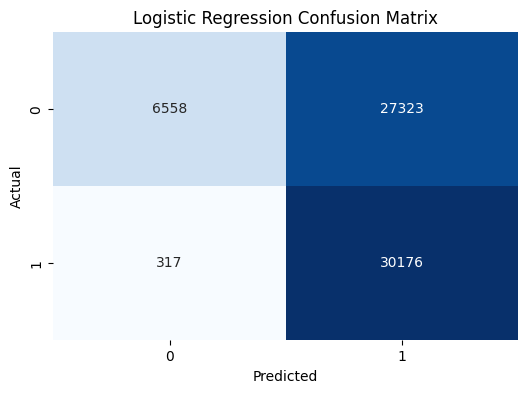

In [24]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_lr)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

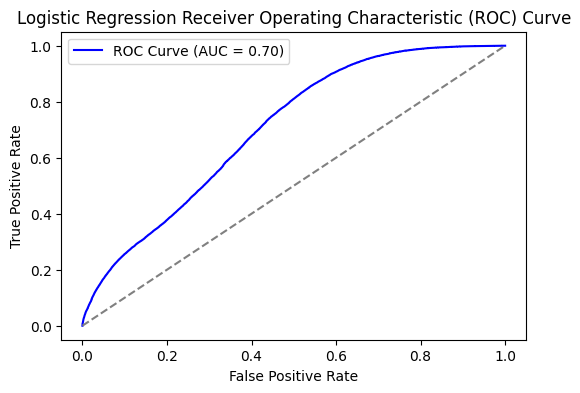

In [25]:
# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba_lr)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()